# Exercise 2: Radial Velocities

# Part 1

This is an example for how to use the provided two-body-problem code to simulate the motion of a planet around a star provided in the file `two_body_problem.py`.

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from two_body_problem import TwoBodyProblem

In [2]:
system = {
    'mass_star': 880,  # in jupiter masses
    'mass_planet': 18.37,  # in jupiter masses
    'period': 1.33,  # days
    'eccentricity': 0.08,
    'inclination': 90.,  # deg
    'v0': np.array((41.70e3, -8.18e3, 1.75e3))  # km/s
}

In [3]:
two_body = TwoBodyProblem(m_p=system['mass_planet'],
                              m_s=system['mass_star'],
                              period=system['period'],
                              eccentricity=system['eccentricity'],
                              inclination=system['inclination'],
                              v0=system['v0'])

time, r_s, v_s, r_p, v_p = two_body.get_orbit(t_min=0,
                      t_max=system['period']*4,
                      num_points=10000)


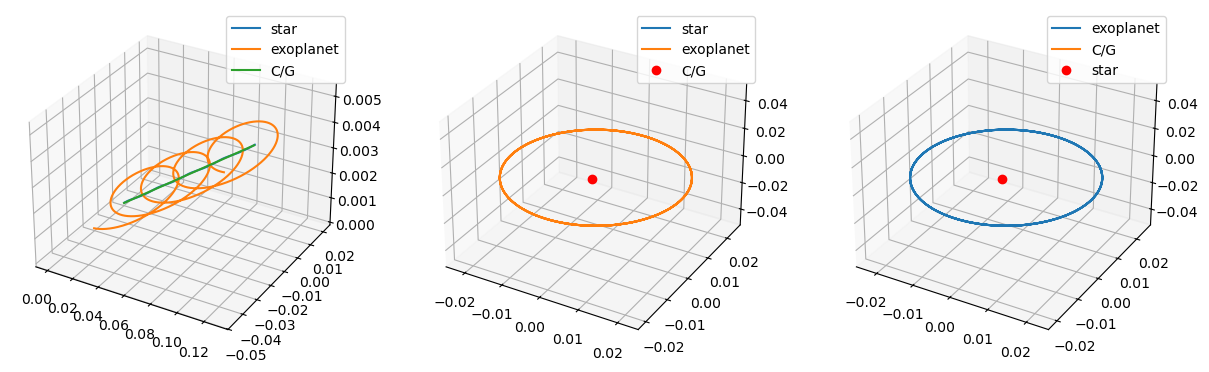

In [4]:
%matplotlib inline
two_body.plot_orbit()

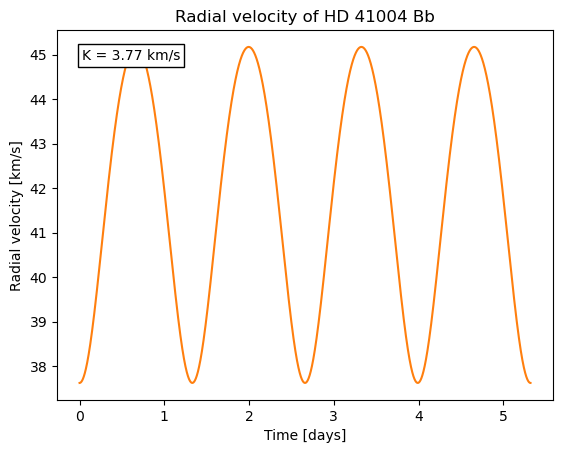

In [5]:
rv = v_s[:, 0]  # radial velocity in m/s

plt.plot(time/(24*60*60), rv/1e3, color='tab:orange')
plt.xlabel('Time [days]')
plt.ylabel('Radial velocity [km/s]')
plt.title('Radial velocity of HD 41004 Bb')

plt.text(0.05, 0.95, f'K = {(np.max(rv)-np.min(rv))/2e3:.2f} km/s', horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(boxstyle="square",
                   fc='white',
                   ))

plt.show()

# Earth twin

In [5]:
# Fill in values for the Earth-twin system

earth_sys = {
    'mass_star': ,  # in jupiter masses
    'mass_planet': ,  # in jupiter masses
    'period': ,  # days
    'eccentricity': ,
    'inclination': 90.,  # deg
    'v0': np.array((0, 0, 0))  # km/s
}

In [6]:
two_body = TwoBodyProblem(m_p=earth_sys['mass_planet'],
                              m_s=earth_sys['mass_star'],
                              period=earth_sys['period'],
                              eccentricity=earth_sys['eccentricity'],
                              inclination=earth_sys['inclination'],
                              v0=earth_sys['v0'])

time, r_s, v_s, r_p, v_p = two_body.get_orbit(t_min=0,
                      t_max=earth_sys['period']*4,
                      num_points=10000)

In [ ]:
# Plot the radial velocity of the Earth-Sun system: rv = v_s[:, 0]  # m/s


# Effect of inclination and eccentricity

# Part 2

Import the 51 Pegasi b data.

In [10]:
peg_b = pd.read_csv('https://share.phys.ethz.ch/~ipa/exoplanet_lecture_FS24/51peg.csv')

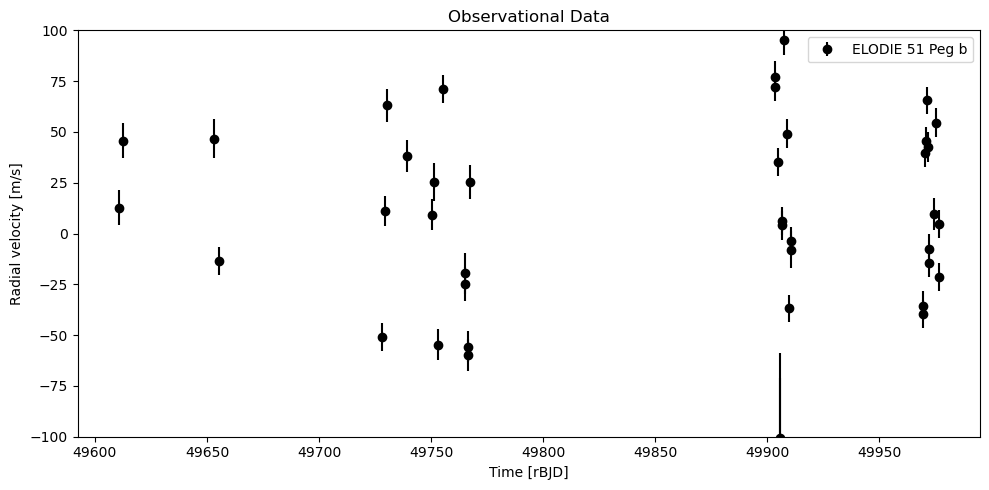

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(x=peg_b['Time [rBJD]'], y=peg_b['deltaRV [m/s]'], yerr=peg_b['deltaRV_error [m/s]'], fmt='ko', label='ELODIE 51 Peg b')

ax.set_xlabel('Time [rBJD]')
ax.set_ylabel('Radial velocity [m/s]')
ax.set_title('Observational Data')
ax.set_ylim(-100, 100)
ax.legend()

plt.tight_layout()
plt.show()